In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.interpolate import lagrange , UnivariateSpline , SmoothBivariateSpline
from skimage import io, img_as_float

%matplotlib inline

In [2]:
#funcion 
x5=np.linspace(-1,1,5)
f5=[np.exp(-(x5[i])**2/0.05) for i in range(np.shape(x5)[0])]

# Polinomios de interpolacion,
pol_L =lagrange(x5,f5)
pol_spl = UnivariateSpline(x5,f5,s=0)

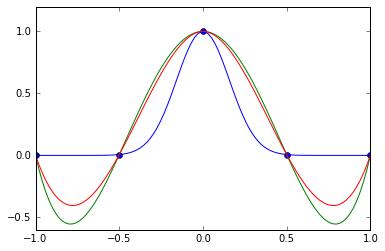

In [3]:
# Ploteo de la funcion 
x=np.linspace(-1,1,100)
f=[np.exp(-(x[i])**2/0.05) for i in range(np.shape(x)[0])]

# Ploteo de los polinomios y los puntos con los que se hicieron x5 y f5 son con 5 puntos entre [-1,1]
pL=[pol_L(x[i]) for i in range(np.shape(x)[0])]
pS=[pol_spl(x[i]) for i in range(np.shape(x)[0])]
plt.plot(x,f)
plt.plot(x5,f5,'bo')
plt.plot(x,pL)
plt.plot(x,pS)


In [4]:
#
# Ploteo de los polinomios y los puntos con los que se hicieron x8 y f8 son con 8 puntos entre [-1,1]
#
x8=np.linspace(-1,1,8)
f8=[np.exp(-(x8[i])**2/0.05) for i in range(np.shape(x8)[0])]

pol_L8 =lagrange(x8,f8)
pol_spl8 = UnivariateSpline(x8,f8,s=0)

pL8=[pol_L8(x[i]) for i in range(np.shape(x)[0])]
pS8=[pol_spl8(x[i]) for i in range(np.shape(x)[0])]

#
# Ploteo de los polinomios y los puntos con los que se hicieron x15 y f15 son con 15 puntos entre [-1,1]
#

x15=np.linspace(-1,1,15)
f15=[np.exp(-(x15[i])**2/0.05) for i in range(np.shape(x15)[0])]

pol_L15 =lagrange(x15,f15)
pol_spl15 = UnivariateSpline(x15,f15,s=0)

pL15=[pol_L15(x[i]) for i in range(np.shape(x)[0])]
pS15=[pol_spl15(x[i]) for i in range(np.shape(x)[0])]

#
# Ploteo de los polinomios y los puntos con los que se hicieron x20 y f20 son con 20 puntos entre [-1,1]
#
x20=np.linspace(-1,1,20)
f20=[np.exp(-(x20[i])**2/0.05) for i in range(np.shape(x20)[0])]

pol_L20 =lagrange(x20,f20)
pol_spl20 = UnivariateSpline(x20,f20,s=0)

pL20=[pol_L20(x[i]) for i in range(np.shape(x)[0])]
pS20=[pol_spl20(x[i]) for i in range(np.shape(x)[0])]



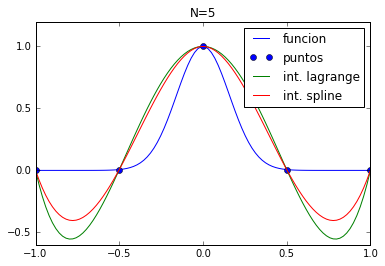

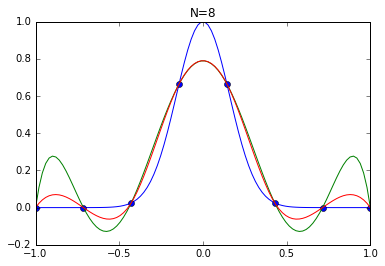

In [5]:
#N=5
plt.subplot(1, 2, 1)
plt.title('N=5')

plt.plot(x,f,'b')
plt.plot(x5,f5,'bo')
plt.plot(x,pL,'g')
plt.plot(x,pS,'r')

#N=8
plt.subplot(1, 2, 2)
plt.title('N=8')
plt.plot(x,f)
plt.plot(x8,f8,'bo')
plt.plot(x,pL8)
plt.plot(x,pS8)


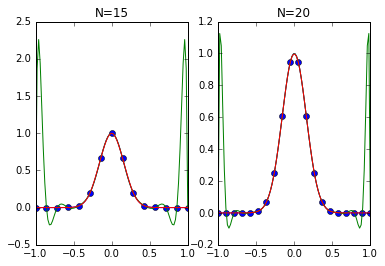

In [6]:
#N=15
plt.subplot(1, 2, 1)
plt.title('N=15')
plt.plot(x,f)
plt.plot(x15,f15,'bo')
plt.plot(x,pL15)
plt.plot(x,pS15)

#N=20
plt.subplot(1, 2, 2)
plt.title('N=20')
plt.plot(x,f)
plt.plot(x20,f20,'bo')
plt.plot(x,pL20)
plt.plot(x,pS20)

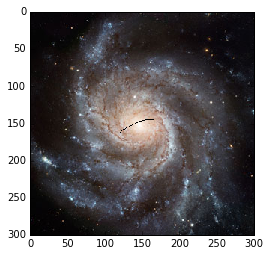

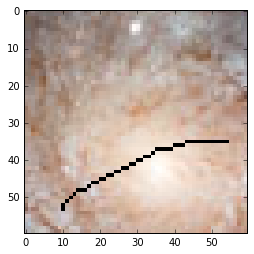

In [7]:
#### P2

# 

img = io.imread('galaxia.bmp')
img = img_as_float(img)

mask = io.imread('mask.bmp')
mask = img_as_float(mask)

plt.figure(1)
plt.clf()
plt.imshow(img, interpolation='nearest')

plt.figure(2)
plt.clf()
plt.imshow(img[110:170, 110:170], cmap=cm.gray, interpolation='nearest')
plt.show()


In [8]:
# Encontrar los pixeles malos 
#mask=mask[110:170, 110:170]
a=np.where(mask==1)
print np.shape(img) , np.shape(a), np.shape(mask[:,:])

(300, 300, 3) (2, 46) (300, 300)


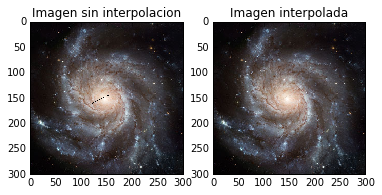

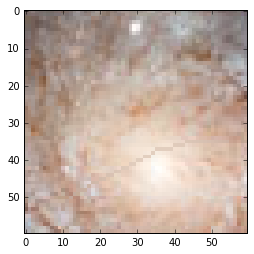

In [9]:
def igual_mask(x,y):
    """
Esta funcion toma dos valores, que respresentan puntos en el plano, tales que si son uno de los puntos que se pueden
encontrar usando mask() y np.where, retorna un booleano, True si no esta y False si esta. Es decir que si el pixel 
que esta en ese punto esta bueno da un True y si no un False
    """
    for i in range(46):
        if x==a[0][i]:
            if y==a[1][i]:
                return False
    
    return True


### I es la segunda imagen que se muestra en lo graficos anteriores 
img = io.imread('galaxia.bmp')
img = img_as_float(img)
I=img[110:170, 110:170]


x_b=[i for i in range(110,170)]
y_b=[i for i in range(110,170)]

X,Y=np.meshgrid(x_b,y_b)
x=[]
y=[]

z0=[]
z1=[]
z2=[]

Mal=[]



for j in range(60):
    for i in range(60):
        if igual_mask(X[j][i],Y[j][i]):
            x.append(X[j][i])
            y.append(Y[j][i])
            
            z0.append(img[Y[j][i],X[j][i],0])
            z1.append(img[Y[j][i],X[j][i],1])
            z2.append(img[Y[j][i],X[j][i],2])
            
        else:
            Mal.append([j,i])
            


S0=SmoothBivariateSpline(x,y,z0)
S1=SmoothBivariateSpline(x,y,z1)
S2=SmoothBivariateSpline(x,y,z2)



###
#####
######### La imagen esta mal evaluada, es decir que estoy usando la imagen entera en vez de usar la imagen del centro
#####
###

            


for k in range(46):
    for i in range(60):
        for j in range(60):
            if i==Mal[k][1] and j==Mal[k][0] :
                    I[i,j,0]=S0.ev(X[i][j],Y[i][j]) 
                    I[i,j,1]=S1.ev(X[i][j],Y[i][j]) 
                    I[i,j,2]=S2.ev(X[i][j],Y[i][j]) 

                    
#I[i,j,0]=S0.ev(X[j][i],Y[j][i]) 
#I[i,j,1]=S1.ev(X[i][j],Y[i][j]) 
    

img[110:170, 110:170]=I
img2=img

img = io.imread('galaxia.bmp')
img = img_as_float(img)

plt.subplot(1,2,1)
plt.title('Imagen sin interpolacion')
plt.imshow(img, interpolation='nearest')

plt.subplot(1,2,2)
plt.title('Imagen interpolada')
plt.imshow(img2, cmap=cm.gray, interpolation='nearest')
plt.show()

plt.imshow(I, interpolation='nearest')

In [10]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, **kwargs)
    Plot lines and/or markers to the
    :class:`~matplotlib.axes.Axes`.  *args* is a variable length
    argument, allowing for multiple *x*, *y* pairs with an
    optional format string.  For example, each of the following is
    legal::
    
        plot(x, y)        # plot x and y using default line style and color
        plot(x, y, 'bo')  # plot x and y using blue circle markers
        plot(y)           # plot y using x as index array 0..N-1
        plot(y, 'r+')     # ditto, but with red plusses
    
    If *x* and/or *y* is 2-dimensional, then the corresponding columns
    will be plotted.
    
    If used with labeled data, make sure that the color spec is not
    included as an element in data, as otherwise the last case
    ``plot("v","r", data={"v":..., "r":...)``
    can be interpreted as the first case which would do ``plot(v, r)``
    using the default line style and color.
    
    If not used wi